<a href="https://colab.research.google.com/github/gsaini/anime-rating-case-study/blob/main/LR_PracticeExercise_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [2]:
import pandas as pd

### Load the dataset

In [10]:
# Load the dataset..
df = pd.read_csv('sample_data/boston.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Check the shape of the dataset

In [11]:
df.shape

(506, 13)

### Get the info regarding column datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Exploratory Data Analysis

Plot the distribution plots for all the numerical features and list your observations.

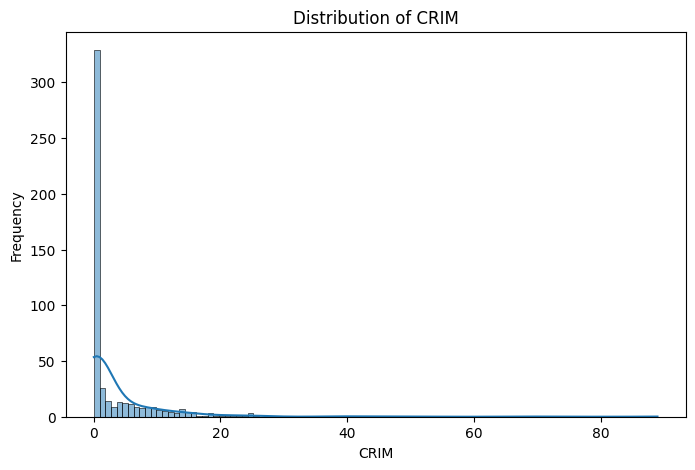

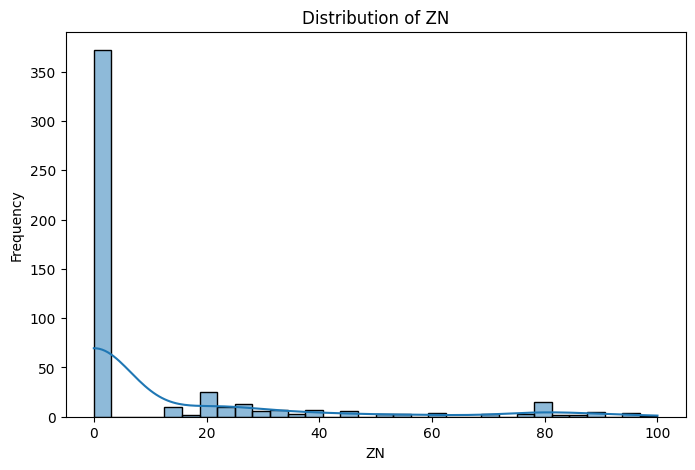

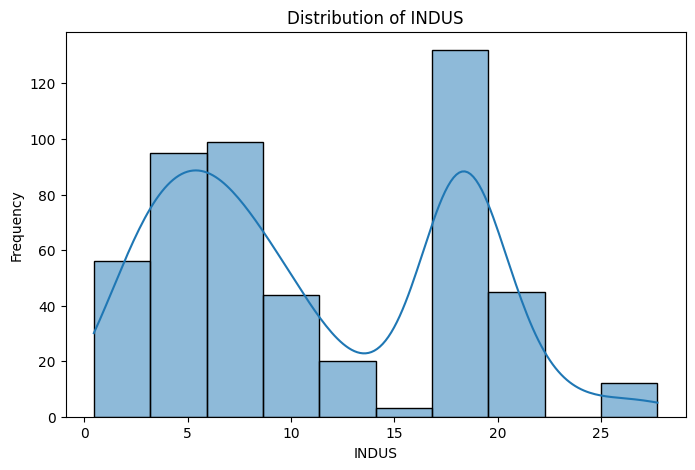

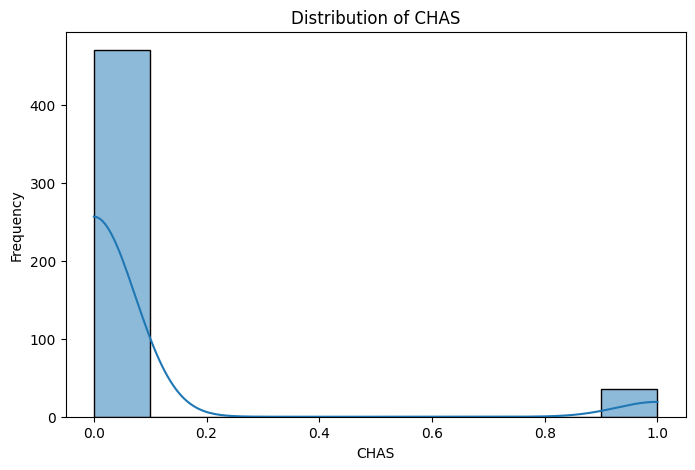

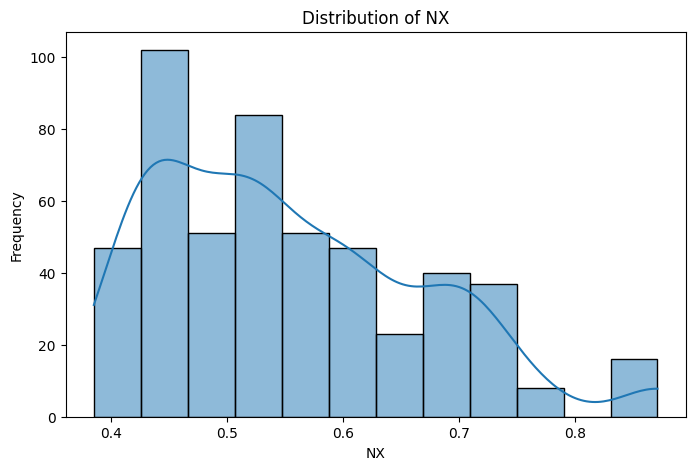

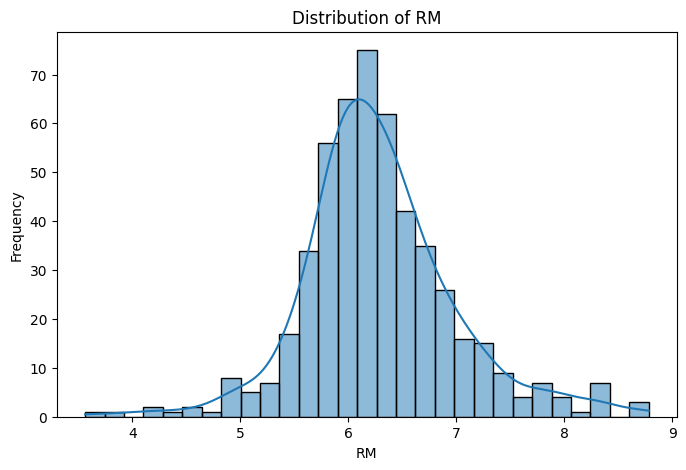

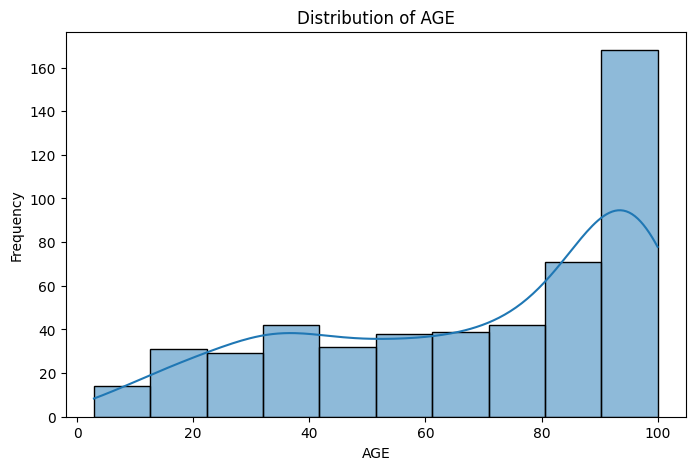

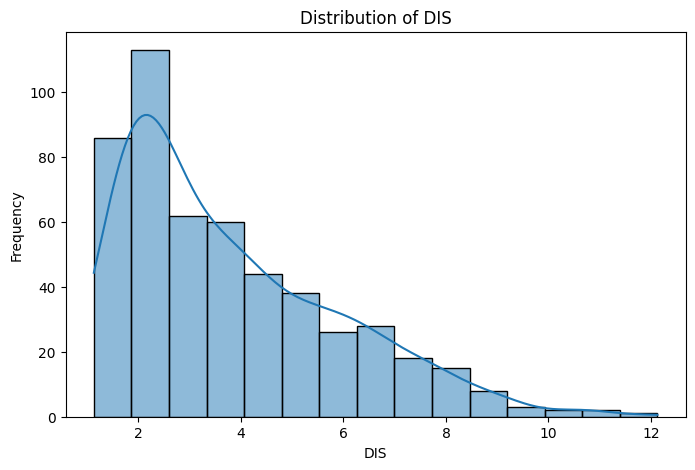

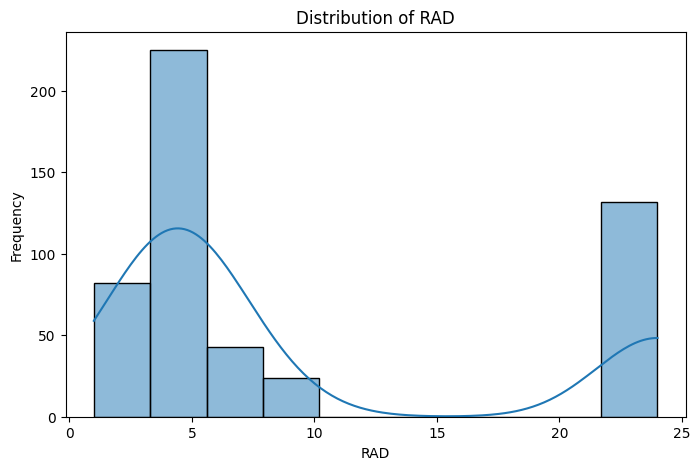

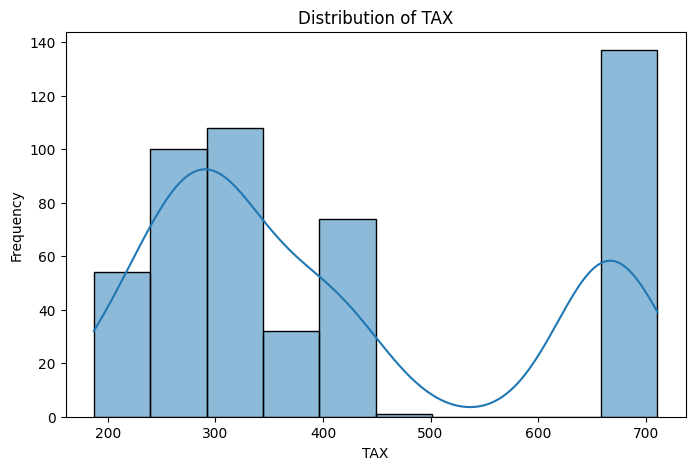

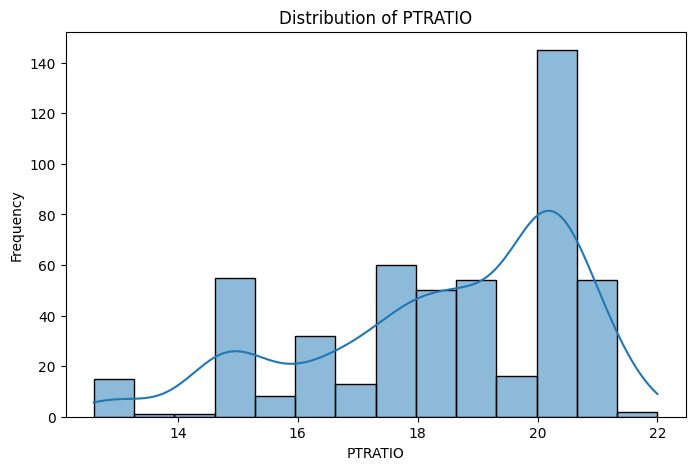

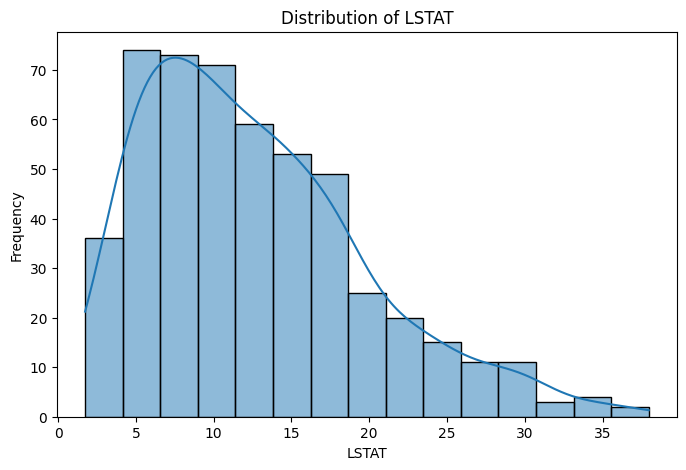

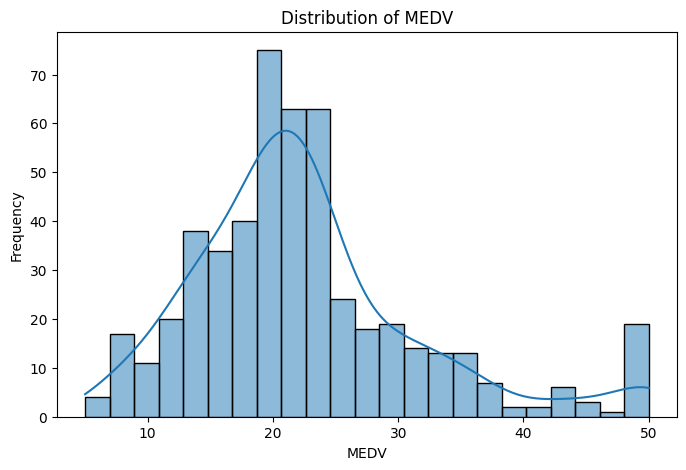

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for plotting
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution plots for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Observations:
# - CRIM, ZN, INDUS, CHAS, DIS, RAD, TAX, PTRATIO, LSTAT, MEDV seem to have skewed distributions.
# - CHAS is a binary variable (0 or 1).
# - RM, AGE, NOX show relatively more normal-like distributions, although some skewness is present.
# - The target variable MEDV is right-skewed. This might require transformation for modeling.
# - Some features like ZN and RAD show peaks at specific values, suggesting grouping or categorical aspects within these numerical features.

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

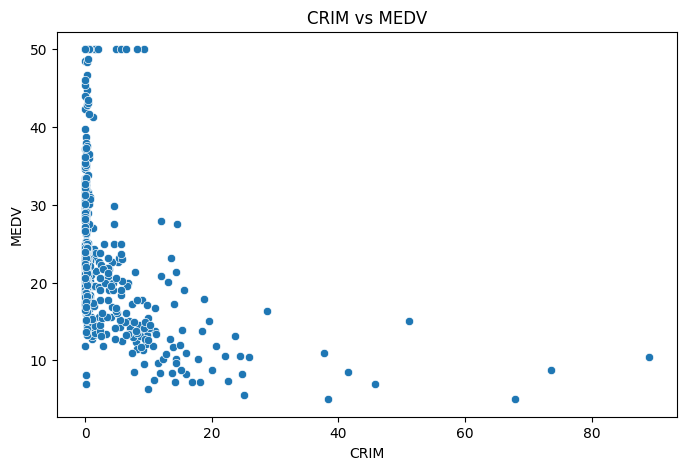

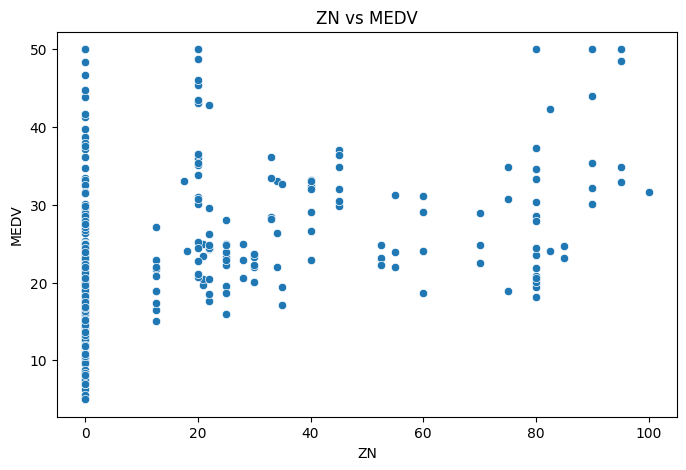

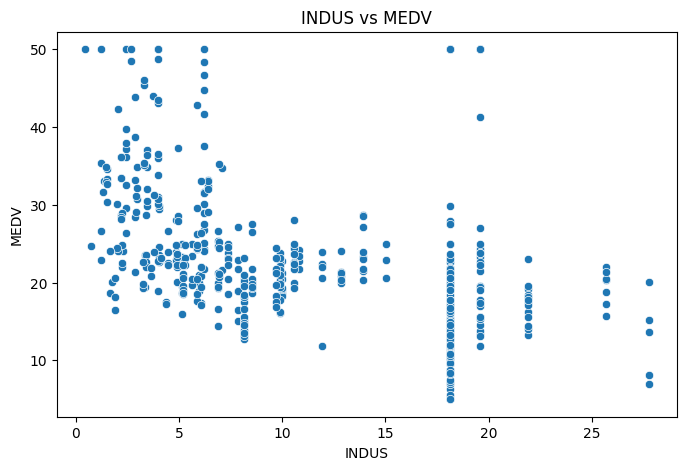

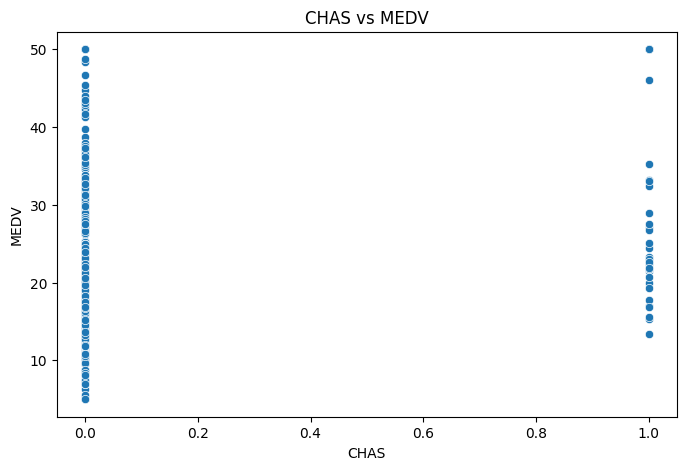

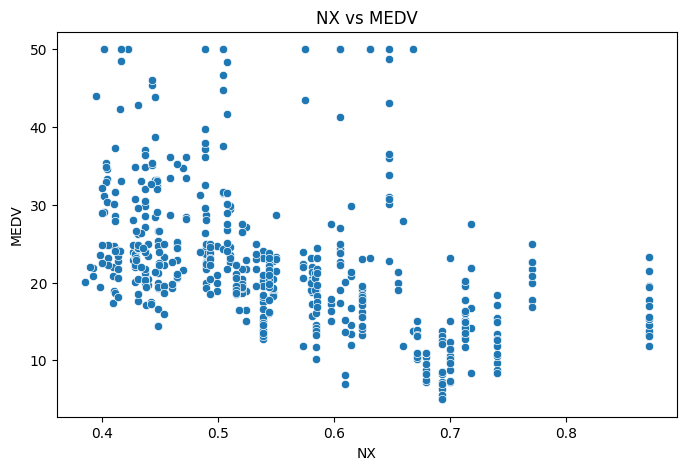

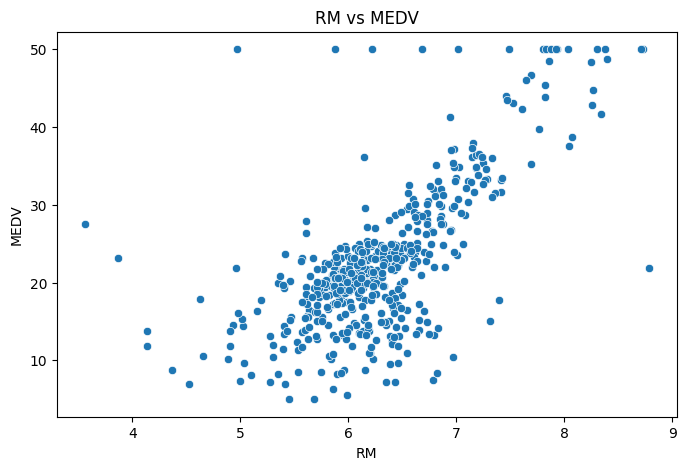

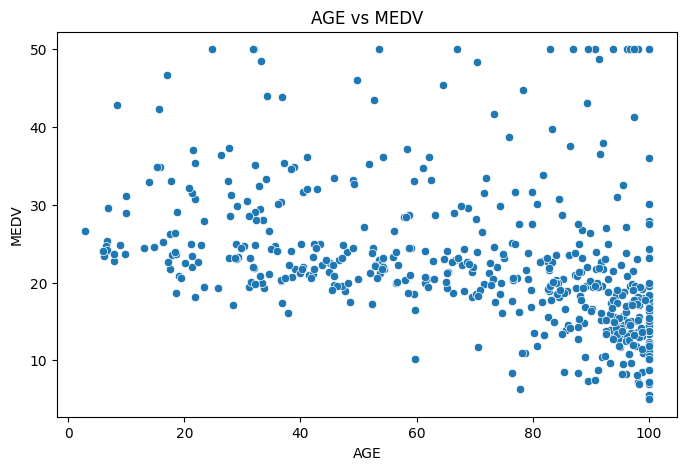

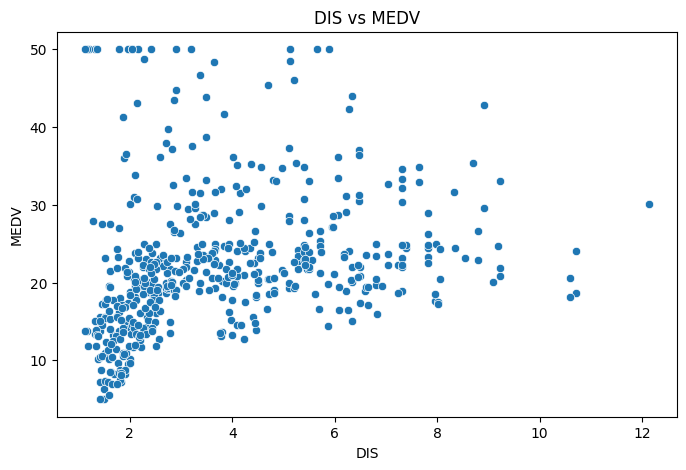

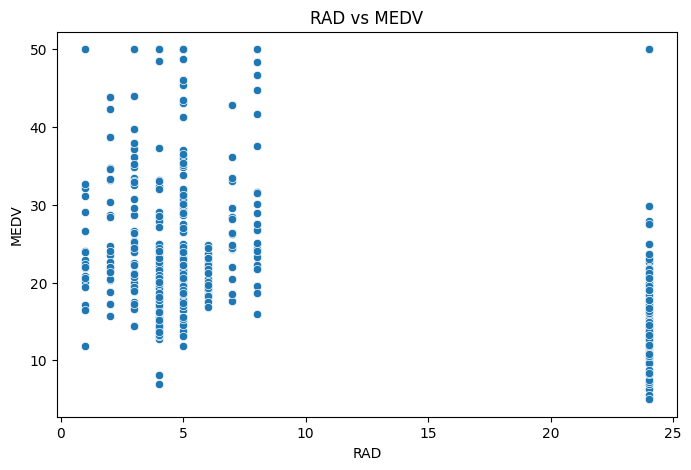

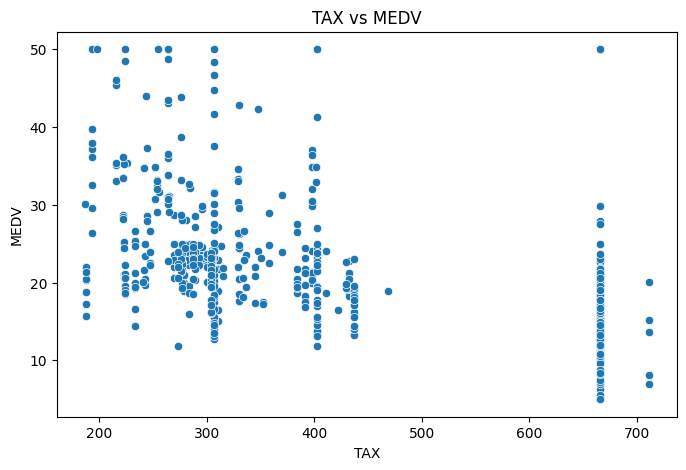

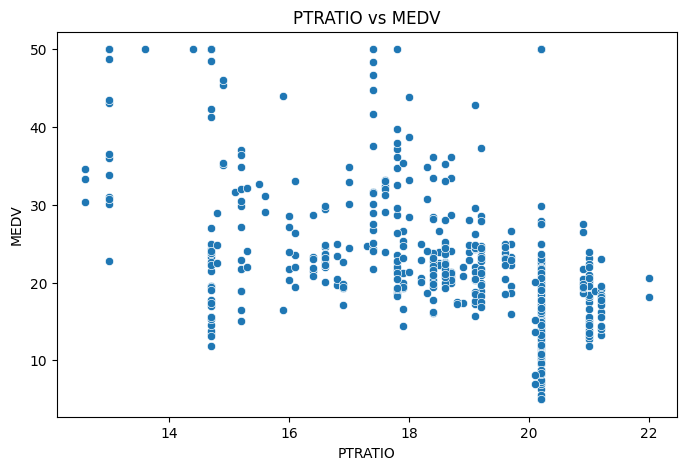

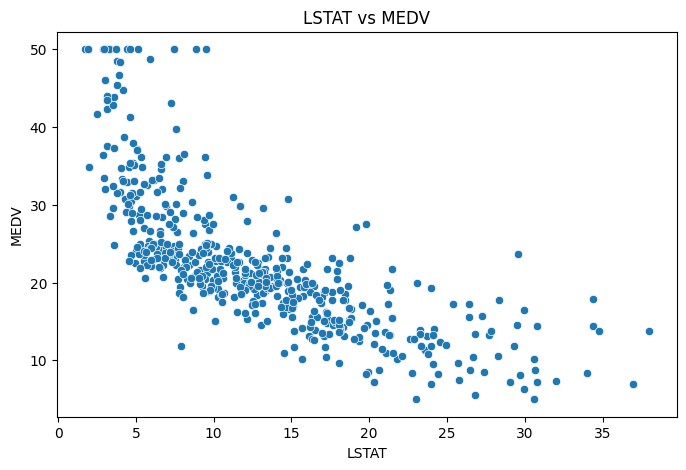

In [30]:
# Plot scatterplots for features and the target variable MEDV
for col in numerical_cols:
    if col != 'MEDV':  # Exclude MEDV plotting against itself
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[col], y=df['MEDV'])
        plt.title(f'{col} vs MEDV')
        plt.xlabel(col)
        plt.ylabel('MEDV')
        plt.show()

# Observations:
# - RM (average number of rooms): Shows a positive linear relationship with MEDV. As the number of rooms increases, the median house value tends to increase. There seems to be a ceiling effect for very high MEDV values.
# - LSTAT (%lower status of the population): Shows a strong negative linear relationship with MEDV. As the percentage of lower status population increases, the median house value tends to decrease.
# - PTRATIO (pupil-teacher ratio): Shows a somewhat negative relationship with MEDV, although the relationship appears less linear and more scattered than RM and LSTAT. There might be some clusters or non-linear patterns.
# - INDUS (proportion of non-retail business acres): Shows a negative relationship with MEDV. As the proportion of non-retail business acres increases, MEDV tends to decrease, but the relationship is not strictly linear and shows more scatter.
# - NOX (nitric oxides concentration): Shows a negative relationship with MEDV. Higher NOX concentration tends to be associated with lower MEDV. There might be some non-linearity or groups.
# - CRIM (per capita crime rate): Shows a negative relationship with MEDV, especially for lower crime rates. As crime rate increases, MEDV tends to decrease, but there's a lot of scatter, especially at higher crime rates where MEDV is generally lower.
# - TAX (full-value property-tax rate): Shows a negative relationship with MEDV. Higher tax rates are associated with lower MEDV. There seems to be a group of properties with high TAX and relatively lower MEDV.
# - DIS (weighted distances to five Boston employment centers): Shows a positive relationship with MEDV. Areas closer to employment centers tend to have lower MEDV, and areas further away tend to have higher MEDV, but the relationship is not very strong or strictly linear.
# - AGE (proportion of owner-occupied units built prior to 1940): Shows a somewhat negative relationship with MEDV, especially for older properties. However, the relationship is not very clear and shows significant scatter.
# - ZN (proportion of residential land zoned for lots over 25,000 sq. ft.): Shows a positive relationship with MEDV, particularly for areas with higher ZN. However, many data points are clustered at ZN=0.
# - RAD (index of accessibility to radial highways): Shows a negative relationship with MEDV, though it's not very clear. There seems to be a split or non-linear pattern, possibly due to RAD being an index.
# - CHAS (Charles River dummy variable): Since it's a binary variable, a scatter plot isn't the best way to visualize this relationship. However, the plot shows two distinct groups of points (at x=0 and x=1), suggesting a difference in MEDV between areas bordering the Charles River and those not. Areas bordering the river (CHAS=1) seem to have a slightly higher median MEDV on average compared to areas not bordering the river (CHAS=0), but with significant overlap in value ranges.

# Overall, RM and LSTAT show the strongest linear relationships with MEDV among the features. Other features like PTRATIO, INDUS, NOX, CRIM, and TAX also show some degree of relationship, but with more scatter and potential non-linearity. CHAS indicates a potential difference in MEDV based on proximity to the river. Features like ZN, DIS, AGE, and RAD show weaker or less clear linear relationships. These observations suggest that RM and LSTAT are likely important predictors of housing prices. Further analysis (e.g., correlation matrix, regression modeling) will be needed to confirm these relationships and assess their significance.

**Plot the correlation heatmap and list your observations.**

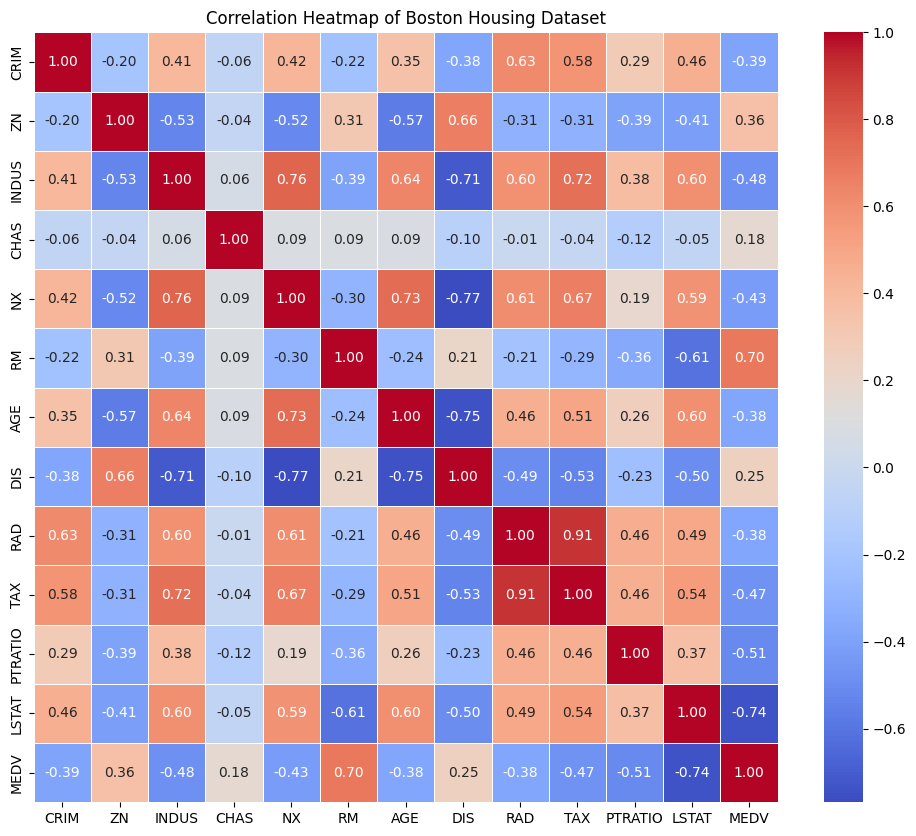

In [29]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

# Observations:
# - **Strong positive correlation with MEDV:** RM (0.70). This confirms that the average number of rooms is strongly and positively related to the median house value.
# - **Strong negative correlation with MEDV:** LSTAT (-0.74), PTRATIO (-0.51). This indicates that the percentage of lower status population and the pupil-teacher ratio have strong negative relationships with MEDV.
# - **Moderate negative correlation with MEDV:** INDUS (-0.48), NOX (-0.43), TAX (-0.47). These features show a moderate negative relationship with house prices.
# - **Weak correlation with MEDV:** CRIM (-0.39), AGE (-0.38), DIS (0.25), RAD (-0.38), ZN (0.36). These features show weaker relationships with MEDV.
# - **CHAS** has a weak positive correlation with MEDV (0.17), suggesting that being near the Charles River might slightly increase the house value, but the correlation is not strong.
# - **Multicollinearity:** There are strong correlations among some independent variables, which is known as multicollinearity. For example:
#     - RAD and TAX have a very strong positive correlation (0.91). This means areas with higher accessibility to radial highways tend to have higher property tax rates. This is a significant concern for linear regression as it can affect the stability and interpretation of coefficient estimates.
#     - NOX is moderately correlated with INDUS (0.76), AGE (0.73), and DIS (-0.70). Areas with more non-retail business acres tend to have higher nitric oxide concentrations and older owner-occupied units, and are closer to employment centers (negative correlation with distance).
#     - INDUS is moderately correlated with AGE (0.64), DIS (-0.71), RAD (0.60), and TAX (0.72).
#     - AGE is moderately correlated with DIS (-0.75). Older properties tend to be further from employment centers.
# - The heatmap visually confirms the relationships observed in the scatter plots and also reveals potential issues like multicollinearity among predictor variables, which will need to be considered during model building. RM, LSTAT, PTRATIO, INDUS, NOX, and TAX appear to be the features most correlated with the target variable MEDV.

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [27]:

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1) # Features are all columns except 'MEDV'
y = df['MEDV']             # Target variable is 'MEDV'

# Split data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (354, 12)
Shape of X_test: (152, 12)
Shape of y_train: (354,)
Shape of y_test: (152,)


### Model Building

**Fit the model to the training set**

In [18]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [19]:
model.score(X_train, y_train)

0.7340777261931662

**Write your own function for the R-squared score.**

In [28]:
import numpy as np

def r_squared(y_true, y_pred):
  """
  Calculates the R-squared (coefficient of determination) score.

  Args:
    y_true: An array-like object of true target values.
    y_pred: An array-like object of predicted target values.

  Returns:
    The R-squared score as a float.
  """
  # Calculate the mean of the true values
  y_true_mean = np.mean(y_true)

  # Calculate the total sum of squares (TSS)
  # TSS = sum of squared differences between true values and their mean
  tss = np.sum((y_true - y_true_mean)**2)

  # Calculate the residual sum of squares (RSS)
  # RSS = sum of squared differences between true values and predicted values
  rss = np.sum((y_true - y_pred)**2)

  # Calculate R-squared
  # R-squared = 1 - (RSS / TSS)
  # Handle the case where TSS is zero (all true values are the same)
  if tss == 0:
      return 1.0 # Perfect fit if all true values are the same
  else:
      return 1 - (rss / tss)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the R-squared score using the custom function
r2_train = r_squared(y_train, y_train_pred)
print(f"Custom R-squared score on training set: {r2_train}")

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate the R-squared score using the custom function on the test set
r2_test = r_squared(y_test, y_test_pred)
print(f"Custom R-squared score on testing set: {r2_test}")

# Compare with the built-in score method (should be the same)
print(f"Built-in R-squared score on training set: {model.score(X_train, y_train)}")
print(f"Built-in R-squared score on testing set: {model.score(X_test, y_test)}")


Custom R-squared score on training set: 0.7340777261931662
Custom R-squared score on testing set: 0.7166209449097798
Built-in R-squared score on training set: 0.7340777261931662
Built-in R-squared score on testing set: 0.7166209449097798


**Get the score on test set**

In [26]:
model.score(X_test, y_test)

0.7166209449097798

**Get the RMSE on test set**

In [23]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse_test = np.sqrt(mse_test)

print(f"RMSE on the test set: {rmse_test}")

RMSE on the test set: 4.595155124026766


**Get the model coefficients.**

In [24]:
# Get the coefficients of the model
coefficients = model.coef_

# Get the intercept of the model
intercept = model.intercept_

# Print the coefficients and intercept
print("Model Coefficients:")
# You can also pair the coefficients with the feature names for better interpretation
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

print("\nModel Intercept:")
intercept

Model Coefficients:
CRIM: -0.1398062608938118
ZN: 0.03611917908428835
INDUS: 0.036298188316487956
CHAS: 3.464922509862706
NX: -15.983176944901988
RM: 3.899807050842811
AGE: -0.008870659291420868
DIS: -1.3885639388972484
RAD: 0.21983016204780434
TAX: -0.009200227539670737
PTRATIO: -0.8905063641345782
LSTAT: -0.5736441765420512

Model Intercept:


np.float64(37.57987443867426)

**Automate the equation of the fit**

In [25]:
# Automate the equation of the fit
equation = f"MEDV = {intercept:.4f}"
for feature, coef in zip(feature_names, coefficients):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.4f} * {feature}"

print("Equation of the fitted model:")
equation

Equation of the fitted model:


'MEDV = 37.5799 - 0.1398 * CRIM + 0.0361 * ZN + 0.0363 * INDUS + 3.4649 * CHAS - 15.9832 * NX + 3.8998 * RM - 0.0089 * AGE - 1.3886 * DIS + 0.2198 * RAD - 0.0092 * TAX - 0.8905 * PTRATIO - 0.5736 * LSTAT'